In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install warnings

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----------- ---------------------------- 3.1/11.1 MB 16.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.1 MB 11.4 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.1 MB 9.0 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 7.0 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 6.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 5.7 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 5.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 5.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.6/41.0 MB 7.9 MB/s eta 0:00:06
   -- ---

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

### Import the libraries

In [5]:
warnings.filterwarnings('ignore')

### load the dataset and check few rows

In [6]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.index +=1

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Chek Null  values

In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Handle null values
#### replace catogorical values with mode and numerical value with mean

In [9]:
for column in df.columns:
    if df[column].dtype == 'O':  # Categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical columns
        df[column].fillna(df[column].mean(), inplace=True)

print("Missing values after handling:", df.isnull().sum())


Missing values after handling: area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### create a new feature like BHK
#### This code extracts the first number from the "size" column and converts it to an integer

In [11]:
df['BHK'] = df['size'].str.split().str.get(0).astype(int)      

In [12]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00,3
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00,2


<Axes: ylabel='Frequency'>

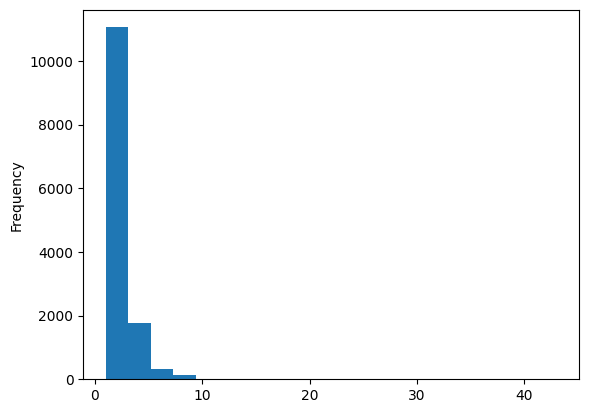

In [13]:
df['BHK'].plot(kind='hist',bins=20)

In [14]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [15]:
def range_converer(x):                                       
    N = x.split('-')
    if len(N) == 2:                                 #This function converts range values into a fix integer and their average or returns a float; errors return None.
        return (float(x[0])+float(x[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df['total_sqft'] = df['total_sqft'].apply(range_converer)

In [17]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


### Create  a new feature price per sqft 

In [18]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

In [19]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3,4305.555556
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1305,), dtype=object)

In [21]:
location_count = df['location'].value_counts()
location_count

location
Whitefield                         541
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

##### This code filters out locations that appear 5 times or fewer and stores them in location_count_less.

In [22]:
location_count_less = location_count[location_count <=5]
location_count_less

location
Lavelle Road                       5
Munivenkatppa Layout               5
Hiremath Layout                    5
Maithri Layout                     5
KR Garden                          5
                                  ..
3rd Stage Raja Rajeshwari Nagar    1
Chuchangatta Colony                1
Electronic City Phase 1,           1
Chikbasavanapura                   1
Abshot Layout                      1
Name: count, Length: 920, dtype: int64

##### This line of code replaces less frequent locations (those appearing 5 times or fewer) with 'other' in the df['location'] column.

In [23]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less else x)

In [24]:
df['location'].value_counts()

location
other                   1816
Whitefield               541
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
                        ... 
Doddakannelli              6
Rajiv Gandhi Nagar         6
 Devarabeesana Halli       6
Nayandanahalli             6
Hennur Bande               6
Name: count, Length: 386, dtype: int64

In [25]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1531.448708,2.692610,1.584376,112.565627,2.802778,7.629203e+04
std,1243.564986,1.337777,0.798360,148.971674,1.294496,8.111395e+05
min,0.500000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1096.000000,2.000000,1.000000,50.000000,2.000000,4.284323e+03
50%,1265.000000,2.000000,2.000000,72.000000,3.000000,5.497606e+03
75%,1660.000000,3.000000,2.000000,120.000000,3.000000,7.486711e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,3.180000e+07


In [26]:
df = df[(df['total_sqft']/df['BHK'])>=300]  #Filters out properties where per BHK space is below 300 sqft, ensuring reasonable apartment sizes.
df = df[df['BHK'] <= 5]                     # Keeps only properties where BHK ≤ 5, removing luxury or unrealistic listings with more than 5 BHKs.
df = df[df['bath'] <= 5]                    # Keeps only properties where bathrooms ≤ 5, removing listings with excessive bathrooms.

In [27]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,1532.869485,2.465521,1.601518,104.405309,2.569553,6227.897981
std,1110.464023,0.851121,0.775578,128.601046,0.783795,4010.477759
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1111.000000,2.000000,1.000000,48.950000,2.000000,4200.279518
50%,1290.000000,2.000000,2.000000,69.000000,2.000000,5284.861974
75%,1658.250000,3.000000,2.000000,110.000000,3.000000,6857.142857
max,52272.000000,5.000000,3.000000,2912.000000,5.000000,176470.588235


In [28]:
df.shape

(12034, 11)

In [29]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3,4305.555556
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2,4250.000000


In [30]:
lower_limit=df['price'].mean()-df['price'].std()*3
upper_limit=df['price'].mean()+df['price'].std()*3         #If price is greater than upper_limit, set it to upper_limit.
                                                           #If price is less than lower_limit, set it to lower_limit.
df['price']=np.where(df['price']>upper_limit,             # Otherwise, keep the original price.
                     upper_limit,                         
                     np.where(df['price']<lower_limit,lower_limit,df['price']))

In [31]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3,4305.555556
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2,4250.000000


In [32]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,1532.869485,2.465521,1.601518,99.258803,2.569553,6227.897981
std,1110.464023,0.851121,0.775578,89.084337,0.783795,4010.477759
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1111.000000,2.000000,1.000000,48.950000,2.000000,4200.279518
50%,1290.000000,2.000000,2.000000,69.000000,2.000000,5284.861974
75%,1658.250000,3.000000,2.000000,110.000000,3.000000,6857.142857
max,52272.000000,5.000000,3.000000,490.208446,5.000000,176470.588235


In [33]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3,4305.555556
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2,4250.000000


 ### Detect and remove the outlair in bath column

<Axes: >

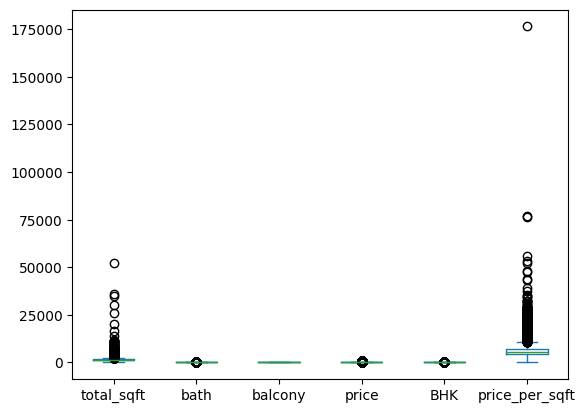

In [34]:
df.plot(kind='box')

In [35]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Specify the columns to remove outliers from
columns_to_remove_outliers = ['total_sqft','bath','balcony','price','BHK','price_per_sqft']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, columns_to_remove_outliers)

# Display the shape of the cleaned DataFrame
print("Original shape:", df.shape)
print("New shape after outlier removal:", df_cleaned.shape)


Original shape: (12034, 11)
New shape after outlier removal: (9955, 11)


### Apply label encoder

In [36]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
for col in ['area_type','availability','location','size','society','total_sqft','bath','balcony','price','BHK','price_per_sqft']:
  df[col] = le.fit_transform(df[col])     

df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
1,3,40,134,3,446,359,1,1,347,1,937
2,2,80,101,8,2375,1456,5,4,1475,3,2269
3,0,80,359,5,778,747,1,4,963,2,1832
4,3,80,245,5,2126,819,3,1,1403,2,4595
5,3,80,235,3,778,504,1,1,701,1,1735
6,3,80,377,3,583,474,1,1,312,1,454
7,3,34,288,7,910,1481,4,2,1556,3,5674
8,3,80,303,7,345,1596,4,2,1723,3,6987
9,3,80,258,5,778,617,3,1,988,2,2590
11,3,29,377,5,778,1085,1,3,1116,2,1187


#### Ploting relation between tatal_sqft and Price

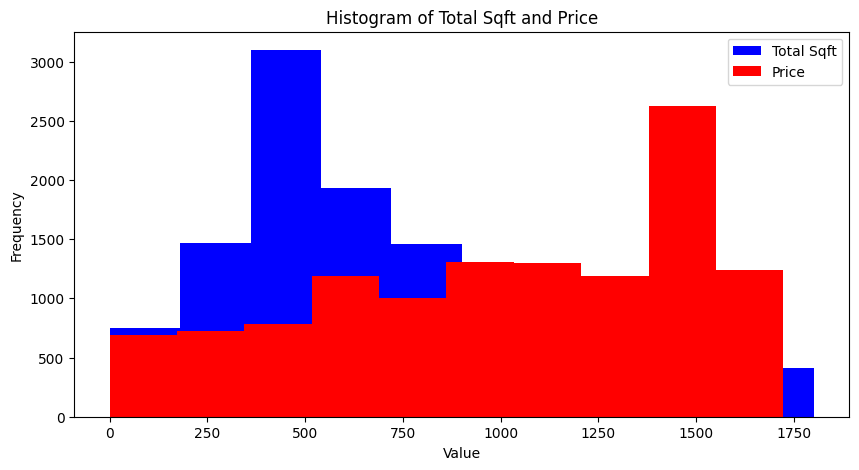

In [37]:
# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(df['total_sqft'], bins=10,label='Total Sqft', color='blue')
plt.hist(df['price'], bins=10,label='Price', color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Total Sqft and Price')
plt.legend()
plt.show()

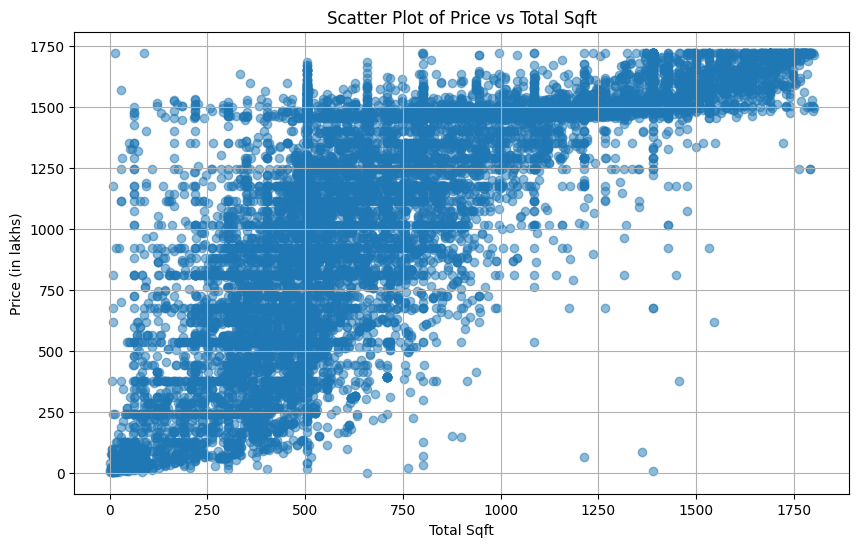

In [38]:
# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Total Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price (in lakhs)')
plt.grid(True)
plt.show()


### Creating a Heatmap

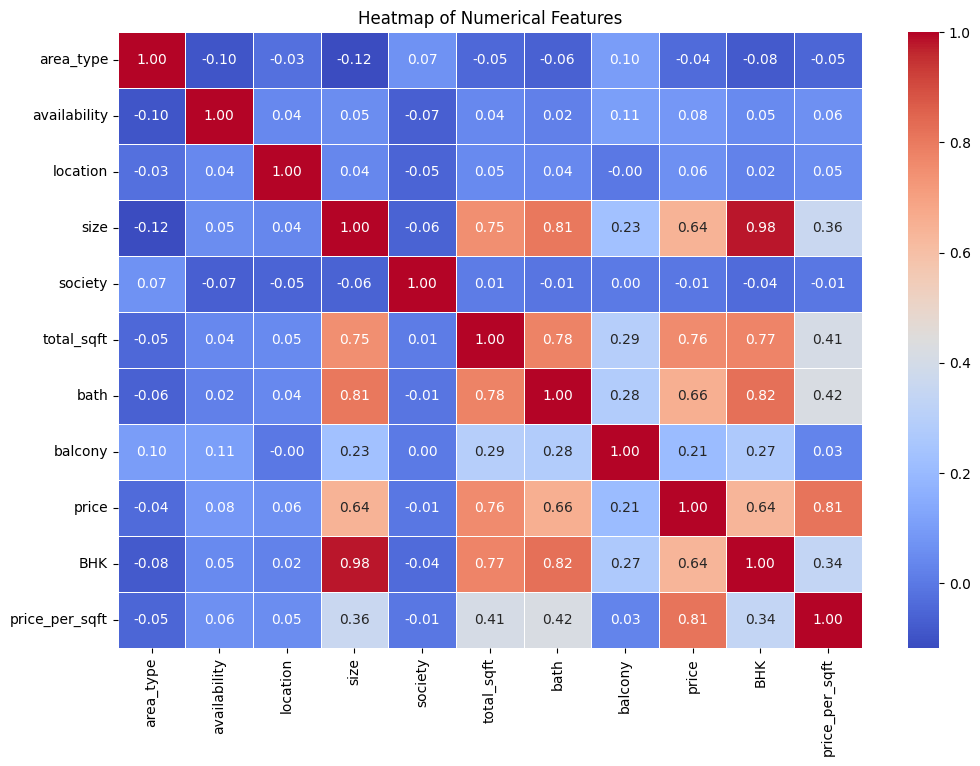

In [39]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Heatmap of Numerical Features")

# Show the plot
plt.show()

In [40]:
# df.drop(columns=['area_type','availability','society','balcony','price_per_sqft' ] , inplace=True)

In [41]:
# df.head()

### Create a ColumnTransformer and apply onehotencoding and StandardScaler on data

In [42]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['location']),  # Encode categorical column
        ('scaler', StandardScaler(), ['total_sqft', 'BHK','size'])  # Scale numerical columns
    ],
    remainder='passthrough'
)

### Drop Unneccesary column like society, balcony, availability, area_type

In [43]:
df.drop(columns=['area_type','availability','society','balcony','bath','price_per_sqft', ] , inplace=True)

In [44]:
df.sample(10)

,location,size,total_sqft,price,BHK
10498,278,3,437,811,1
12324,195,5,709,921,2
722,177,5,1100,1455,2
11456,171,3,377,778,1
8148,169,8,557,1455,3
2474,200,5,922,811,2
2604,385,3,352,312,1
12192,385,5,898,1455,2
12558,160,5,1258,1514,2
9676,375,3,552,1091,1


In [45]:
# df= df[['location','total_sqft','BHK','bath','price']]
# df.head()

#### separating the data and labels

In [46]:
# x= df.iloc[:,:-1]
# y = df.iloc[:,-1]
x = df[['location', 'total_sqft', 'size', 'BHK']]  # Select specific features
y = pd.DataFrame(df['price'])  # Target colum

In [47]:
x.head()

,location,total_sqft,size,BHK
1,134,359,3,1
2,101,1456,8,3
3,359,747,5,2
4,245,819,5,2
5,235,504,3,1


In [48]:
y.head()

,price
1,347
2,1475
3,963
4,1403
5,701


### Train Test split

In [49]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (x , y , test_size=0.2 , random_state=1)

In [50]:
print("Shape of Original datasets : " , df.shape)

Shape of Original datasets :  (12034, 5)


In [51]:
print("Shape of X training data : " ,X_train.shape)
print("Shape of X test data : " , X_test.shape)
print("Shape of Y training data : " , Y_test.shape)
print("Shape of Y test data : " , Y_test.shape)

Shape of X training data :  (9627, 4)
Shape of X test data :  (2407, 4)
Shape of Y training data :  (2407, 1)
Shape of Y test data :  (2407, 1)


In [52]:
X_train.columns

Index(['location', 'total_sqft', 'size', 'BHK'], dtype='object')

In [53]:
Y_train.columns

Index(['price'], dtype='object')

In [54]:
Y_train.isnull().sum()

price    0
dtype: int64

In [55]:
Y_train.isnull().sum()

price    0
dtype: int64

### Training  a model 

#### RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model

RandomForestRegressor()

### Create a pipeline and apply  model

In [57]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline (ct, model)

In [58]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'size'])])),
                ('randomforestregressor', RandomForestRegressor())])

### fit X_train , Y_train

In [59]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'size'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [60]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(X_test)
print("R2 Score:" , r2_score(Y_test ,y_pred))

R2 Score: 0.7491625407840885


In [61]:
Y_test.head()

,price
8635,617
9873,1145
7311,1220
8818,1220
12968,833


In [62]:
X_train.head()

,location,total_sqft,size,BHK
11217,280,402,3,1
8444,95,535,5,2
1804,169,261,3,1
4836,385,1266,5,2
4615,362,898,8,3


In [63]:
# # Example input data
# new_data = pd.DataFrame({
#   'location': [130],
#     'total_sqft': [1056],
#     'size':[3],
#     'BHK': [2],
# })
# #Make predictions
# predicted_price = model.predict(new_data)
# print(f"Predicted Price: {predicted_price[0]}")balcony': [1]
new_data = pd.DataFrame({
    'location': [135],  # Location should be a string (not numeric) # error
    'total_sqft': [1056],
    'size': [3],
    'BHK':[2]
})

# Make predictions using the pipeline
predicted_price = pipe.predict(new_data)
print(f"Predicted Price: Rs {predicted_price[0]:.2f}")


Predicted Price: Rs 1184.52


#### LinearRegression

In [64]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [65]:
pipe1 = make_pipeline(ct ,linear_regression )
pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'size'])])),
                ('linearregression', LinearRegression())])

In [66]:
pipe1.fit(X_train , Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'size'])])),
                ('linearregression', LinearRegression())])

In [67]:
y_pred = pipe1.predict(X_test)
print("R2 Score:" , r2_score(Y_test ,y_pred))

R2 Score: 0.7050453510262741


#### DecisionTreeRegressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [69]:
pipe2 = make_pipeline(ct , decision_tree)
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'size'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [70]:
pipe2.fit(X_train , Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'size'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [71]:
y_pred = pipe2.predict(X_test)
print("R2 Score:" , r2_score(Y_test ,y_pred))

R2 Score: 0.6755213794421829


###  Support vector regression

In [72]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, Y_train)

SVR()

In [73]:
pipe3 = make_pipeline(ct ,svr)
pipe3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'size'])])),
                ('svr', SVR())])

In [74]:
pipe3.fit(X_train , Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'size'])])),
                ('svr', SVR())])

In [75]:
y_pred = pipe3.predict(X_test)
print("R2 Score:" , r2_score(Y_test ,y_pred))

R2 Score: 0.5303711127784649


### save the model

In [76]:
# import pickle
# pickle.dump(pipe , open('random_forest_house_price_model.pkl', 'wb'))
# pickle.dump(df, open('dataset.pkl','wb'))